In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

In [58]:
df = pd.read_csv("bankloans.csv")
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [59]:
# find the null values in the data set

df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [60]:
# letts assume all null values are 0
df.dropna(inplace=True) 

<Axes: xlabel='age', ylabel='income'>

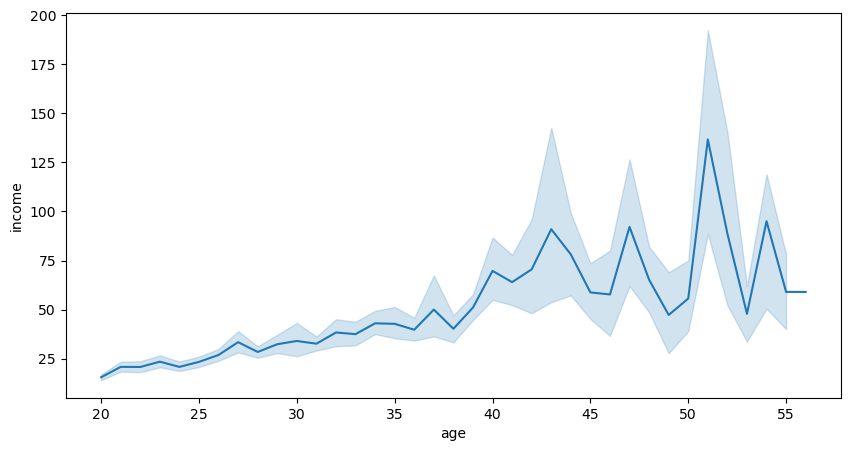

In [61]:
# find relationship between age and income

plt.figure(figsize=(10,5))
sns.lineplot(x='age', y='income', data=df)

<Axes: xlabel='age', ylabel='debtinc'>

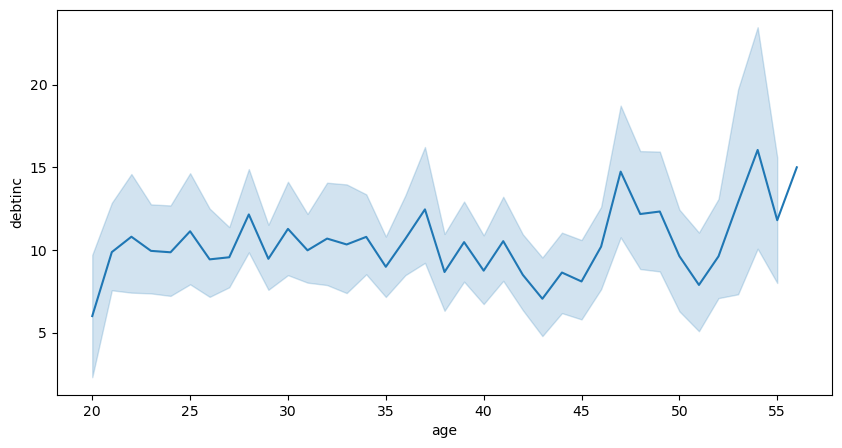

In [62]:
# find relationship between age and debt-income

plt.figure(figsize=(10,5))
sns.lineplot(x='age', y='debtinc', data=df)

In [63]:
# prepare, train, and evaluate a different types of model for predicting the 'default' status of individuals 
# based on various features in the dataset.

# Define features (X) and target variable (y)
X = df.drop(['default'], axis=1)
y = df['default']


In [64]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [65]:
# standardize the range of independent variables and features of a dataset. To ensure that the features have the same scale.

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


### **Creating Model**

Random Model

In [66]:
rfc = RandomForestClassifier(n_estimators=200)

In [67]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [68]:
# Cheack the score value
rfc.score(X_test, y_test)

0.8

In [69]:
# cross validation score for more accuracy 
rfc2 = cross_val_score(rfc, X=X_train, y=y_train, cv=20)
rfc2.mean()

0.7732142857142856

Support Vector Machines

In [70]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [71]:
sv.score(X_test, y_test)

0.7928571428571428

In [77]:
model = GridSearchCV(sv,{
    'C' : [0.1,0.2,0.4,0.8,1.2,2.0,3.1,4.0],
    'gamma' : [0.1,0.2,0.3,1.0,1.5,2.2,3.1],
    'kernel' : ['rbf','linear'] },scoring='accuracy', cv=20)

In [78]:
model.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 2.0, 3.1, 4.0],
                         'gamma': [0.1, 0.2, 0.3, 1.0, 1.5, 2.2, 3.1],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [79]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [80]:
model2 = SVC(C=0.1, gamma=0.1, kernel= 'linear')
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8214285714285714

Logistics regression 

In [81]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [82]:
lr.score(X_test,y_test)

0.8357142857142857

<Axes: >

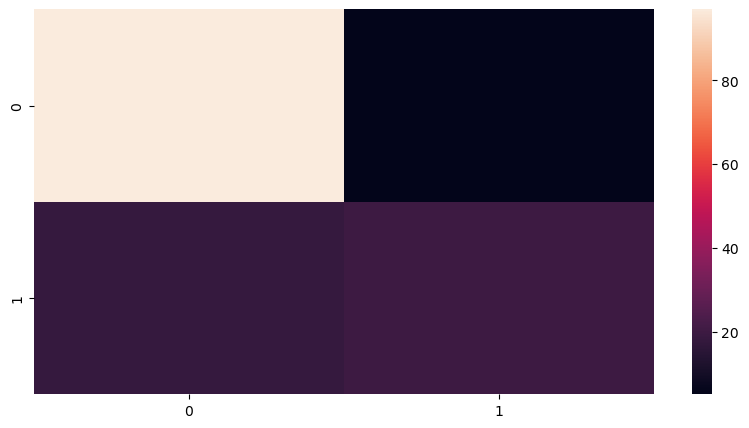

In [86]:
# why prediction not 100 % carrect ?
# understand with the help of Heat Map

yp = lr.predict(X_test)
c = confusion_matrix(y_test, yp)

plt.figure(figsize=(10,5))
sns.heatmap(c)           